# 2.5 手写数字的数据集MNIST

**Source：** part2_mnist_data_set.ipynb

In [23]:
# python notebook for Make Your Own Neural Network
# working with the MNIST data set
#
# (c) Tariq Rashid, 2016
# license is GPLv2

In [24]:
import numpy
import matplotlib.pyplot
%matplotlib inline
import scipy.special

In [25]:
# open the CSV file and read its contents into a list
data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [26]:
# check the number of data records (examples)
len(data_list)

100

In [27]:
# show a dataset record
# the first number is the label, the rest are pixel colour values (greyscale 0-255)
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

其中，第一个数字5是标签

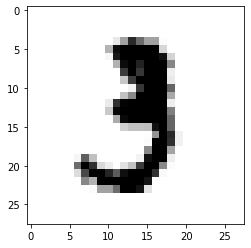

In [28]:
# take the data from a record, rearrange it into a 28*28 array and plot it as an image
# 把784个数转换为28*28的数组
all_values = data_list[10].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
# 灰度调色板
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

## 2.5.1 准备MNIST训练数据

In [29]:
# scale input to range 0.01 to 1.00
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [30]:
#output nodes is 10 (example)
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

In [31]:
print(targets)

[0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01]


**Source：** part2_neural_network_mnist_data.ipynb

In [32]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# (c) Tariq Rashid, 2016
# license is GPLv2

In [33]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [34]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [35]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [39]:
# train the neural network

# epochs is the number of times the training data set is used for training
# 训练数据循环5遍
epochs = 5

for e in range(epochs):

    # go through all records in the training data set
    for record in training_data_list:

        # split the record by the ',' commas
        all_values = record.split(',')

        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01

        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99

        # 训练神经网络n
        n.train(inputs, targets)
        pass

    pass

## 2.5.2 测试网络

In [40]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

测试一下test_data_list

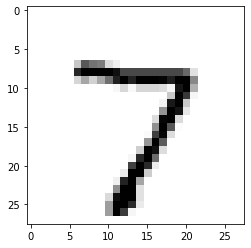

In [42]:
# take the data from a record, rearrange it into a 28*28 array and plot it as an image
# 把784个数转换为28*28的数组
all_values = test_data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
# 灰度调色板
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [45]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.03947367],
       [0.00422177],
       [0.05013139],
       [0.01939337],
       [0.01086232],
       [0.04890035],
       [0.00135184],
       [0.92798919],
       [0.01571626],
       [0.03259313]])

第7个为最大值[0.92798919], Bingo!

In [48]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:

    # split the record by the ',' commas
    all_values = record.split(',')

    # correct answer is first value
    correct_label = int(all_values[0])
    print(correct_label, "correct_label")

    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    # query the network
    outputs = n.query(inputs)

    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    print(label, "network's answer")

    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

7 correct_label
7 network's answer
2 correct_label
2 network's answer
1 correct_label
1 network's answer
0 correct_label
0 network's answer
4 correct_label
4 network's answer
1 correct_label
1 network's answer
4 correct_label
9 network's answer
9 correct_label
4 network's answer
5 correct_label
4 network's answer
9 correct_label
9 network's answer


一共预测对了6个！

In [49]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 0, 0, 0, 1]


In [50]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.7


# 2.5.3 使用完整数据集进行训练和测试

**Source：** part2_neural_network_mnist_data.ipynb

代码同上一节，但使用完整数据集。

但完整数据集太大了，没有下载，所以代码不能运行

准确率0.9712，还是非常高的！